In [101]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [82]:
df=pd.read_csv("Residential_Sale_Index.csv")
df.head(3)

first_date_of_month  flat_monthly_index  flat_monthly_price_index
130            1/1/2022               1.228                   1049652
131            1/2/2022               1.259                   1075996
132            1/3/2022               1.285                   1100294

In [3]:
df.shape

(133, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   first_date_of_month       133 non-null    object 
 1   flat_monthly_index        133 non-null    float64
 2   flat_monthly_price_index  133 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


In [5]:
#converting to a daytime object 
df["first_date_of_month"] =  pd.to_datetime(df["first_date_of_month"], format="%d/%m/%Y")

In [6]:
#seting daytime as index
df=df.set_index("first_date_of_month")
df.head(3)

flat_monthly_index  flat_monthly_price_index
first_date_of_month                                              
2011-03-01                        1.034                    973739
2011-04-01                        1.032                    981915
2011-05-01                        1.028                    980076

<AxesSubplot:>

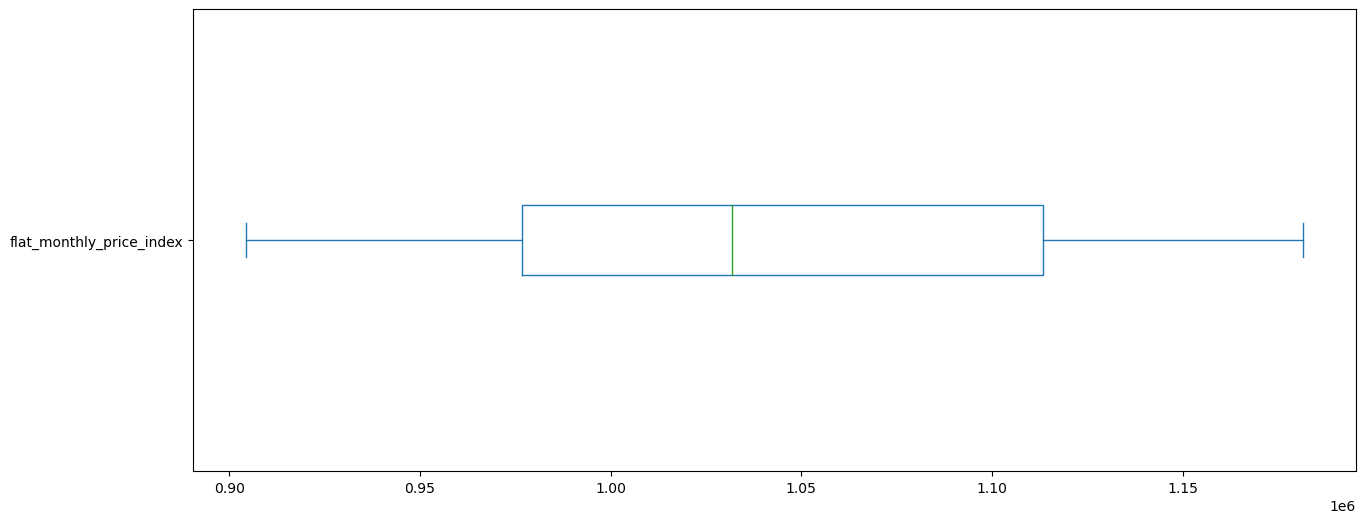

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))
df["flat_monthly_price_index"].plot(kind="box",ax=ax,vert=False)

<AxesSubplot:title={'center':'monthly price index time series'}, xlabel='date', ylabel='monthly price index'>

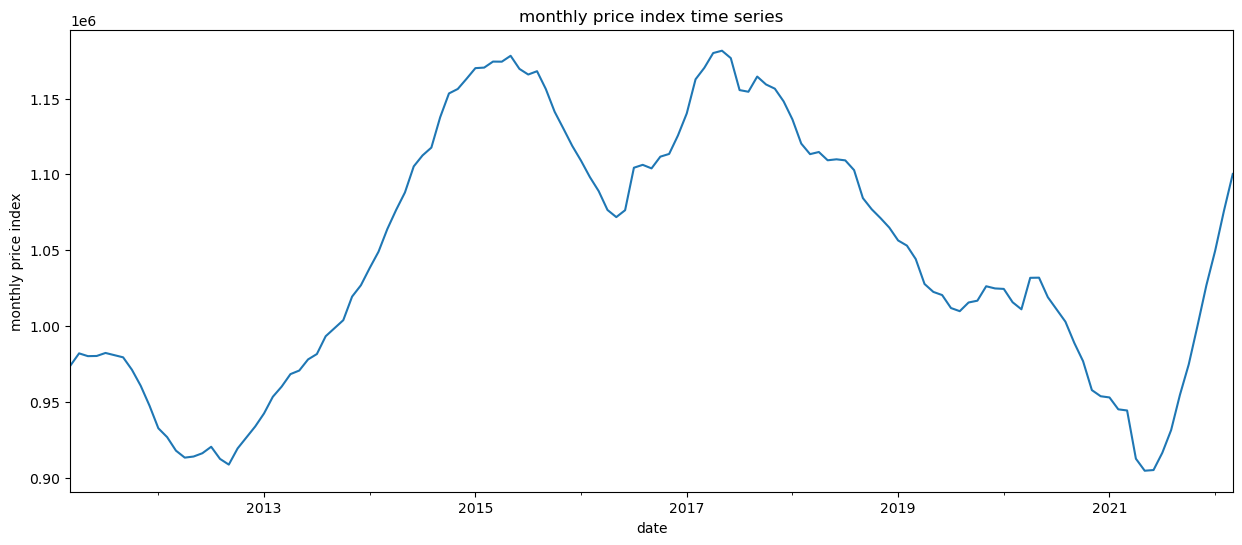

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
df["flat_monthly_price_index"].plot(ax=ax,xlabel="date",ylabel="monthly price index",title= "monthly price index time series")


In [9]:
#ploting rolling average 
#fig, ax = plt.subplots(figsize=(15, 6))
#df["flat_monthly_price_index"].rolling(2).mean().plot(ax=ax);

In [10]:
#creating another feature to use as y(target) in the next linear regression model 
df["flat_monthly_price_index.T-1"]=df["flat_monthly_price_index"].shift(1)

In [11]:
df.head(3)

flat_monthly_index  flat_monthly_price_index  \
first_date_of_month                                                 
2011-03-01                        1.034                    973739   
2011-04-01                        1.032                    981915   
2011-05-01                        1.028                    980076   

                     flat_monthly_price_index.T-1  
first_date_of_month                                
2011-03-01                                    NaN  
2011-04-01                               973739.0  
2011-05-01                               981915.0

In [12]:
df=df.dropna()

In [13]:
df.shape

(132, 3)

In [14]:
# looking at corrolation
df[["flat_monthly_price_index","flat_monthly_price_index.T-1"]].corr()

flat_monthly_price_index  \
flat_monthly_price_index                      1.000000   
flat_monthly_price_index.T-1                  0.991262   

                              flat_monthly_price_index.T-1  
flat_monthly_price_index                          0.991262  
flat_monthly_price_index.T-1                      1.000000

Text(0.5, 1.0, 'flat_monthly_price_index_autocorrolation')

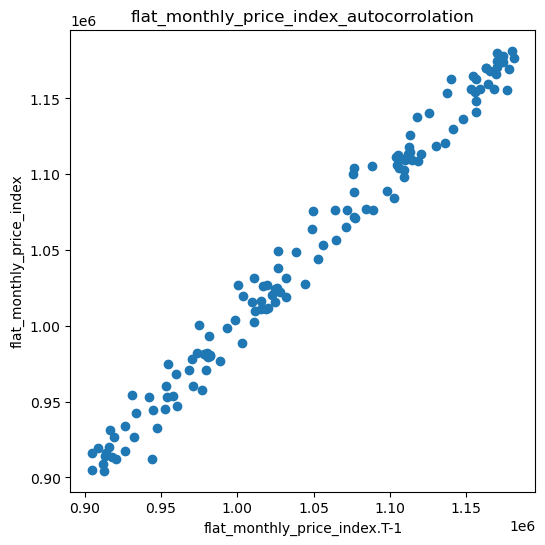

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x=df["flat_monthly_price_index.T-1"],y=df["flat_monthly_price_index"])
plt.xlabel("flat_monthly_price_index.T-1")
plt.ylabel("flat_monthly_price_index")
plt.title("flat_monthly_price_index_autocorrolation")

In [16]:
target = "flat_monthly_price_index"
y = df[target]
X = df.drop(columns=[target,"flat_monthly_index"])

In [17]:
X.head(2)

flat_monthly_price_index.T-1
first_date_of_month                              
2011-04-01                               973739.0
2011-05-01                               981915.0

In [18]:
#spliting the data to have 20% for testing 
# i can not do train test split because i need the test data to be the news .2 data in time (newest not oldest!)
cutoff = int(len(X)*.8)
X_train, y_train = X.iloc[:cutoff],y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:],y.iloc[cutoff:]

In [19]:
# setting a base line for the model performance(the base line is the mean of y)
y_pred_baseline = [y_train.mean()]*len(y_train)# this will yield a list of the same mean
r2_baseline = r2_score(y_train,y_pred_baseline)
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

# y mean (the target ) has not any prediction power!
print("Mean flat_monthly_price_index Reading:", round(y_train.mean(), 2))
print("r_score Baseline MAE:", round(r2_baseline, 2))
print("mean absolute error Baseline MAE:", round(mae_baseline, 2))

Mean flat_monthly_price_index Reading: 1061495.78
r_score Baseline MAE: 0.0
mean absolute error Baseline MAE: 73819.0


##  Linear  Regression Model

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
training_mae = mean_absolute_error(y_train,model.predict(X_train))
test_mae = mean_absolute_error(y_test,model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 7648.75
Test MAE: 13562.43


In [22]:
training_r2_score = r2_score(y_train,model.predict(X_train))
test_r2_score= r2_score(y_test,model.predict(X_test))
print("Training R2:", round(training_r2_score, 2))
print("Test R2:", round(test_r2_score, 2))

Training MAE: 0.99
Test MAE: 0.9


In [ ]:
# R2 score for testing tata is .9 ( very good model!)

In [23]:
intercept = model.intercept_
coefficient = model.coef_

# printing linear regression equation 
print(f"P2 = {intercept} + ({coefficient} * flat_monthly_price_index.T-1)")

P2 = 11571.855317443144 + ([0.98955146] * flat_monthly_price_index.T-1)


In [24]:
df_pred_test = pd.DataFrame({"y_test":y_test,"y_pred":model.predict(X_test)})
df_pred_test.head()

y_test        y_pred
first_date_of_month                       
2020-01-01           1024430  1.025618e+06
2020-02-01           1015635  1.025298e+06
2020-03-01           1010972  1.016595e+06
2020-04-01           1031753  1.011981e+06
2020-05-01           1031854  1.032545e+06

In [25]:
df_pred_test.shape

(27, 2)

In [26]:
fig = px.line(df_pred_test,labels={"value":"flat_monthly_price_index"})
fig.show()

## Auto Corrolation Model

#### ACF Plot

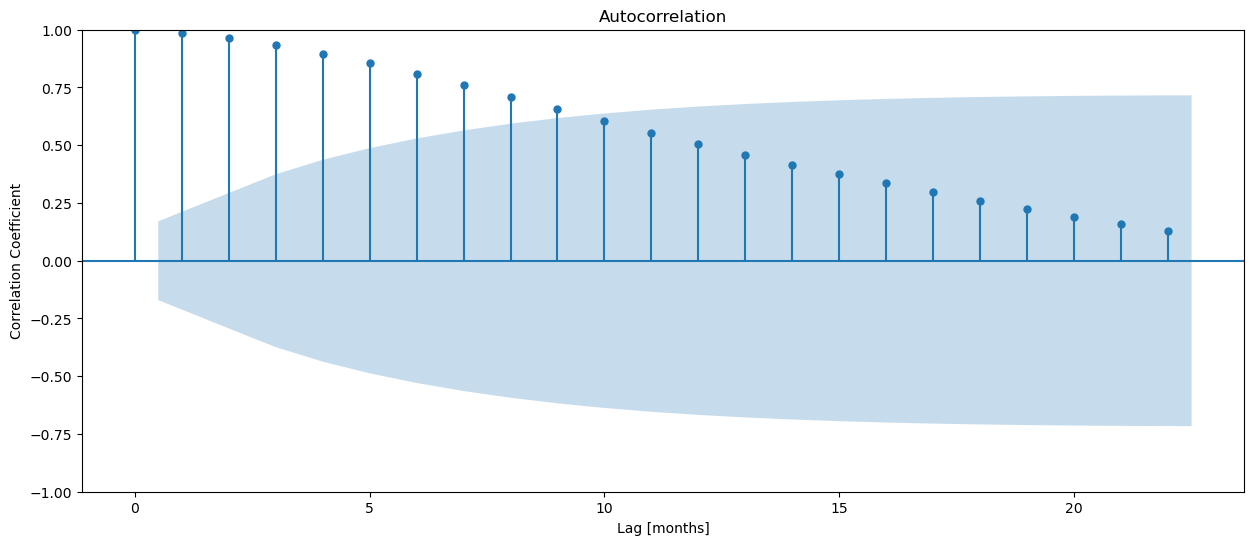

In [29]:
# plotting 
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y,ax=ax)
plt.xlabel("Lag [months]")
plt.ylabel("Correlation Coefficient");

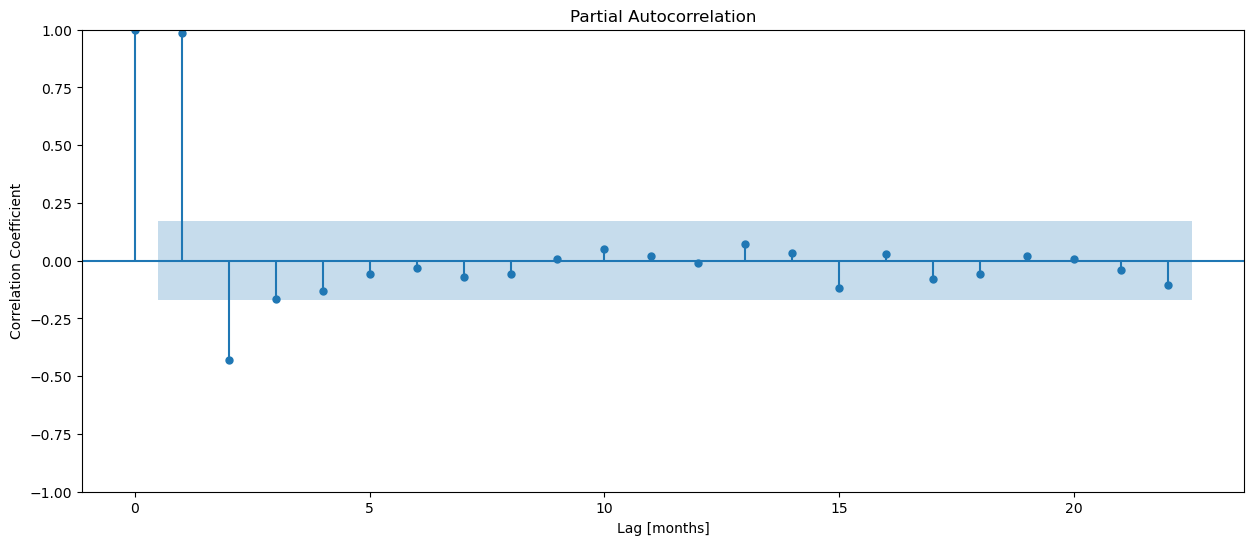

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y,ax=ax,method='ywm')
plt.xlabel("Lag [months]")
plt.ylabel("Correlation Coefficient");

In [54]:
model = AutoReg(y_train, lags=4).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [55]:
# testing on the trainning data 
y_pred = model.predict().dropna()
training_mae = mean_absolute_error(y_train.iloc[4:],y_pred)
training_r2 = r2_score(y_train.iloc[4:],y_pred)
print("Training MAE:", training_mae)
print("Training R2:", training_r2)

Training MAE: 5301.888582599284
Training R2: 0.9931956829282581


In [56]:
# calculating residuals
y_train_resid = model.resid
y_train_resid.tail()

first_date_of_month
2019-08-01    2864.948133
2019-09-01    6373.978547
2019-10-01    -905.040681
2019-11-01    8532.585603
2019-12-01   -8631.589981
dtype: float64

<AxesSubplot:xlabel='first_date_of_month'>

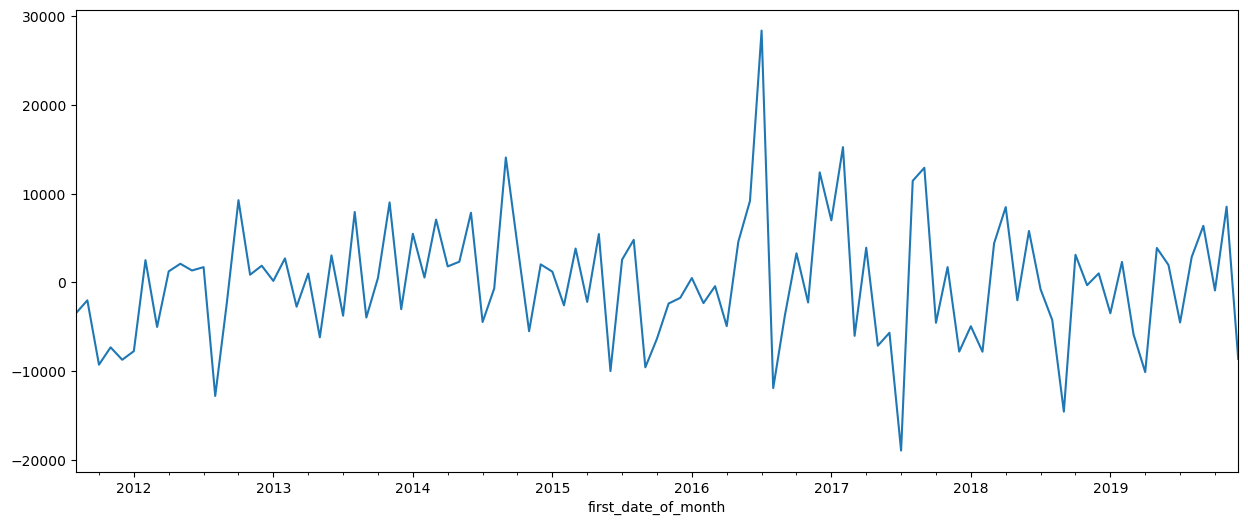

In [57]:
# plot time series plot of the residuals 
fig, ax = plt.subplots(figsize=(15, 6))
y_train_resid.plot(ax=ax)

Text(0.5, 0, 'residual value')

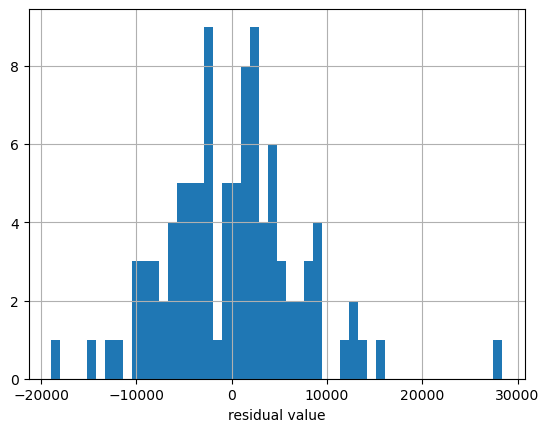

In [58]:
# plot histogram of the residuals 
y_train_resid.hist(bins=50)
plt.xlabel("residual value")

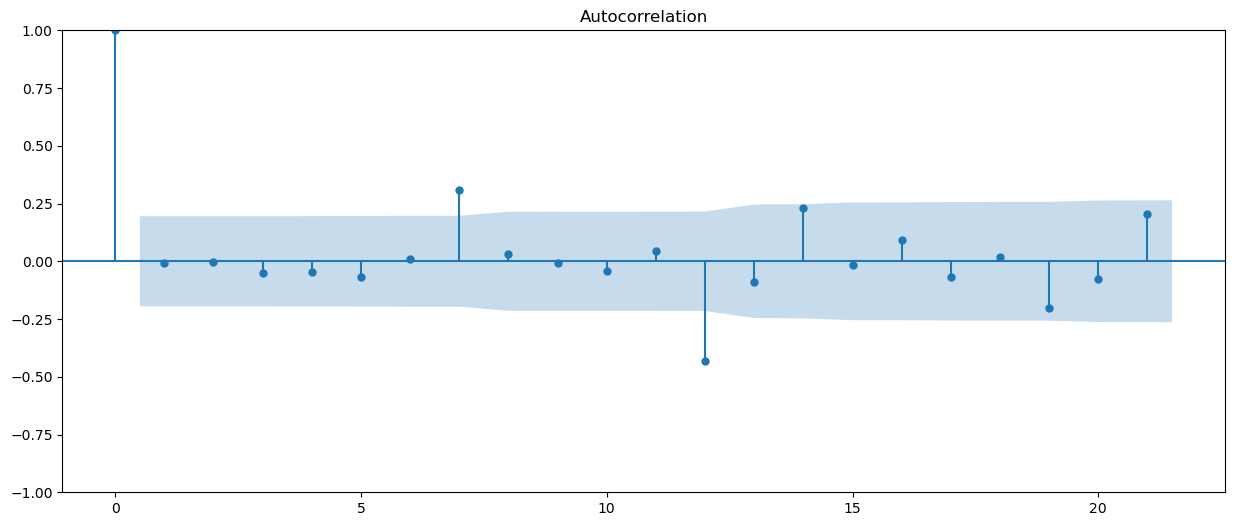

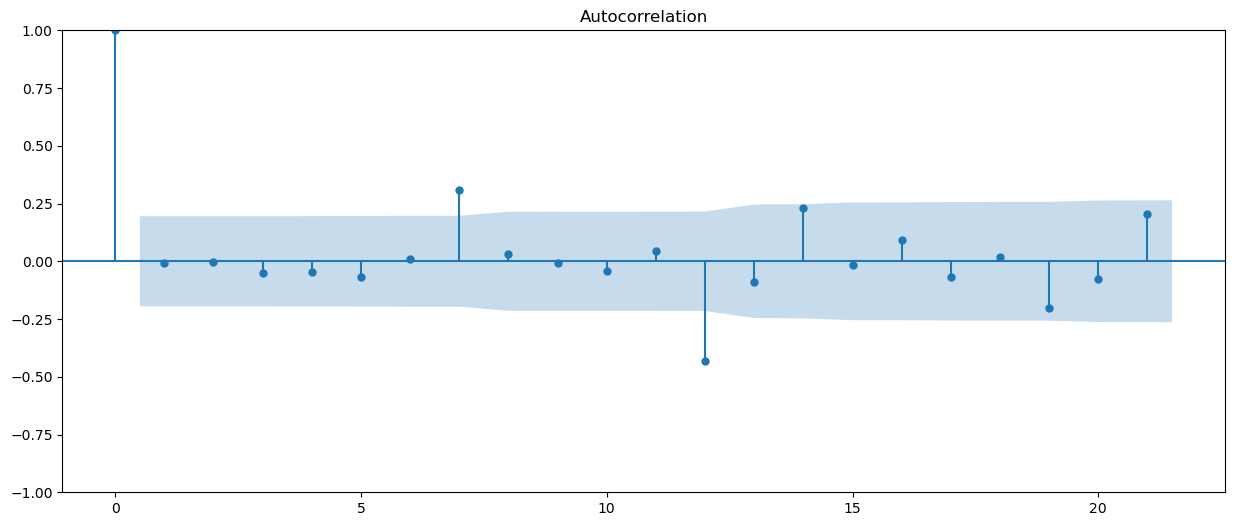

In [59]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid,ax=ax)

### Validataon on test dataset without walk forward validation

In [62]:
# tesing on the test data 
y_pred_test = model.predict(y_test.index.min(),y_test.index.max())
test_mae = mean_absolute_error(y_test,y_pred_test)
test_r2 = r2_score(y_test,y_pred_test)
print("Test MAE:", test_mae)
print("Test r2:", test_r2)

Test MAE: 67057.97929356757
Test r2: -1.7127333197977985


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



In [65]:
df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index)

df_pred_test.head(2)

y_test        y_pred
first_date_of_month                       
2020-01-01           1024430  1.024898e+06
2020-02-01           1015635  1.027819e+06

In [75]:
fig = px.line(df_pred_test, labels={"value": "flat_monthly_price_index"})
fig.show()

### With Walk forward validation

In [71]:
%%capture #This is a simple way to suppress unwanted output.
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model=AutoReg(history,lags=4).fit()
    next_pred=model.forecast()
    y_pred_wfv=y_pred_wfv.append(next_pred)
    history=history.append(y_test[next_pred.index])

In [72]:
test_mae = mean_absolute_error(y_test,y_pred_wfv)
test_r2 = r2_score(y_test,y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))
print("Test R2 (walk forward validation):", test_r2)

Test MAE (walk forward validation): 8547.71
Test R2 (walk forward validation): 0.9533383294243973


very good model better than the first linear regression model

In [74]:
# model intercept and coofficeints
print(model.params)

const                          20425.766538
flat_monthly_price_index.L1        1.549938
flat_monthly_price_index.L2       -0.506585
flat_monthly_price_index.L3        0.117379
flat_monthly_price_index.L4       -0.179881
dtype: float64


In [79]:
df_pred_test = pd.DataFrame( {"y_test":y_test,"y_pred_wfv":y_pred_wfv})
fig = px.line(df_pred_test , labels ={"value":"flat_monthly_price_index"})
fig.show();

# Forecast Using Autoregression Model

In [99]:
AR_model = AutoReg(y, lags=4).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [100]:
AR_model.forecast()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



2022-04-01    1.119437e+06
Freq: MS, dtype: float64

## ARMA Model

In [108]:
import warnings

In [132]:
p_params = range(0,13,2)
q_params = range(0,4,1)
list(q_params)

[0, 1, 2, 3]

In [133]:
mae_grid = dict()
r2_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    r2_grid[p]=list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 0, q)
        model = ARIMA(y_train,order=order).fit()
        # Generate in-sample (training) predictions
        y_pred = model.predict()
        # Calculate training R2 ,MAE
        mae = mean_absolute_error(y_train,y_pred)
        mae_grid[p].append(mae)
        r2 = r2_score(y_train,y_pred)
        r2_grid[p].append(r2)
        print (order)
        
print()
print(mae_grid)        
print(r2_grid)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was 

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency informatio

(0, 0, 3)
(2, 0, 0)
(2, 0, 1)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



(2, 0, 2)
(2, 0, 3)
(4, 0, 0)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was 

(4, 0, 1)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



(4, 0, 2)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



(4, 0, 3)
(6, 0, 0)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was 

(6, 0, 1)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, 

(6, 0, 2)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



(6, 0, 3)
(8, 0, 0)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



(8, 0, 1)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, 

(8, 0, 2)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency in

(8, 0, 3)
(10, 0, 0)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



(10, 0, 1)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, 

(10, 0, 2)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



(10, 0, 3)
(12, 0, 0)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



(12, 0, 1)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



(12, 0, 2)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



(12, 0, 3)

{0: [73819.00390022676, 38496.818842910965, 23172.82390272889, 16667.06029156076], 2: [6268.731700271718, 5953.455232071412, 5924.309880380583, 5886.487261544292], 4: [5902.911972284624, 5917.850984626921, 5794.872126095952, 5652.160138092714], 6: [5914.892647090936, 5914.852809488987, 5740.753015094742, 5536.674104166749], 8: [5623.8359897895, 5532.107009009545, 5389.922197004876, 5505.851928231192], 10: [5461.055332315429, 5446.644742748378, 5394.658084418914, 5389.87862135829], 12: [5437.112807230213, 5467.528354716764, 5143.389425473061, 5138.17616002156]}
{0: [0.0, 0.7242239551119674, 0.8942298920330558, 0.9418183286117838], 2: [0.9844332220561761, 0.9846928332880858, 0.9848904226331399, 0.9849172789647724], 4: [0.9848809112248768, 0.9848969618279866, 0.9851400993072039, 0.985294201224152], 6: [0.9848874749524925, 0.9848875058112396, 0.9855205354149751, 0.9859652896737486], 8: [0.9853667067455504, 0.9854796602015888, 0.9860523050170269, 0.986019637105715], 10: [0.98565

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [134]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

0          2          4          6          8          10  \
0  73819.0039  6268.7317  5902.9120  5914.8926  5623.8360  5461.0553   
1  38496.8188  5953.4552  5917.8510  5914.8528  5532.1070  5446.6447   
2  23172.8239  5924.3099  5794.8721  5740.7530  5389.9222  5394.6581   
3  16667.0603  5886.4873  5652.1601  5536.6741  5505.8519  5389.8786   

          12  
0  5437.1128  
1  5467.5284  
2  5143.3894  
3  5138.1762

In [135]:
r2_df = pd.DataFrame(r2_grid)
r2_df

0         2         4         6         8         10        12
0  0.000000  0.984433  0.984881  0.984887  0.985367  0.985658  0.985689
1  0.724224  0.984693  0.984897  0.984888  0.985480  0.985715  0.985802
2  0.894230  0.984890  0.985140  0.985521  0.986052  0.986044  0.986382
3  0.941818  0.984917  0.985294  0.985965  0.986020  0.986209  0.986353

So ,best efficient order interms of time and accuracy is (2,0,1)

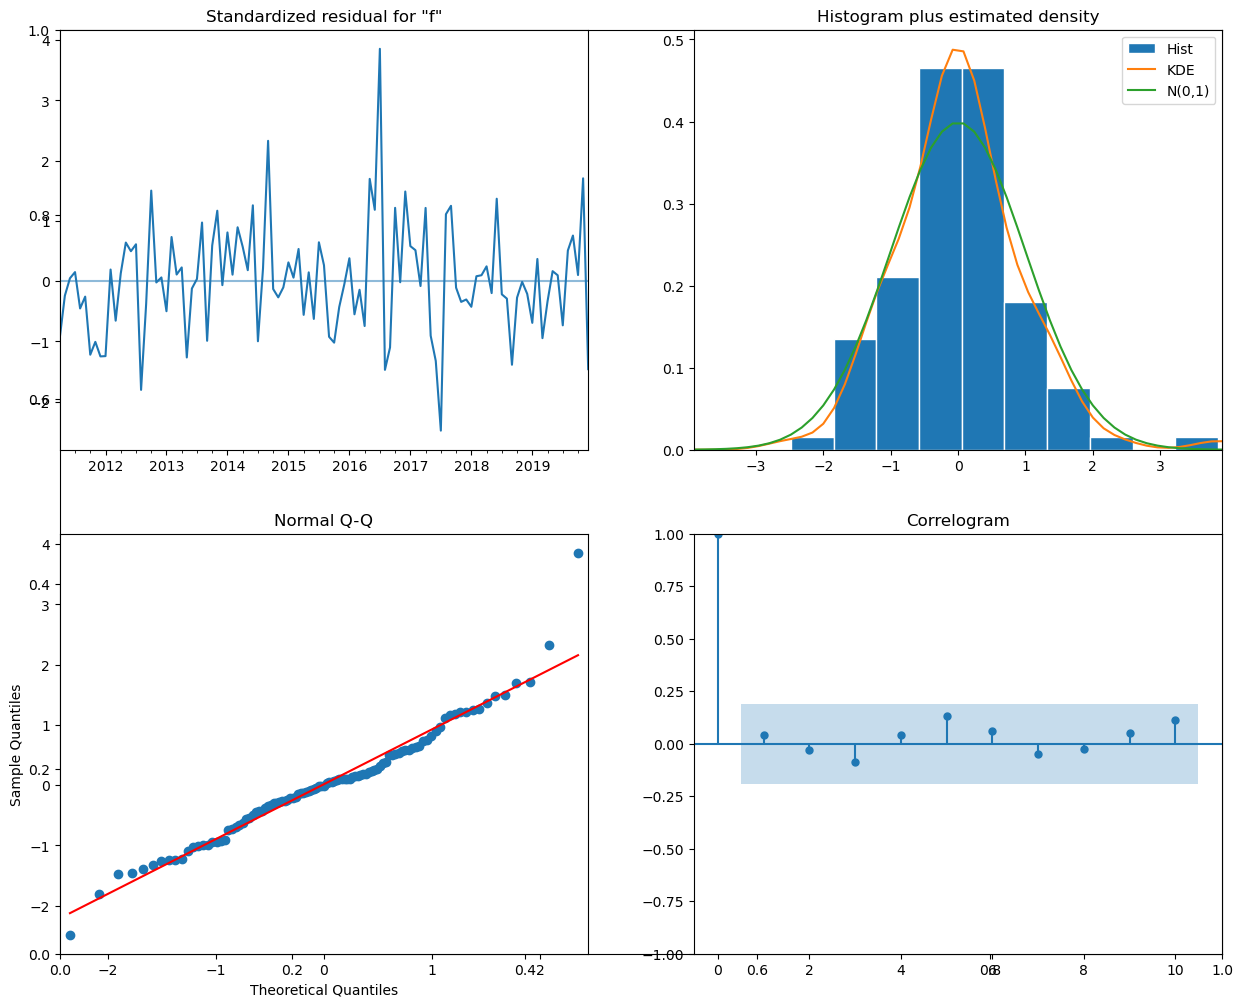

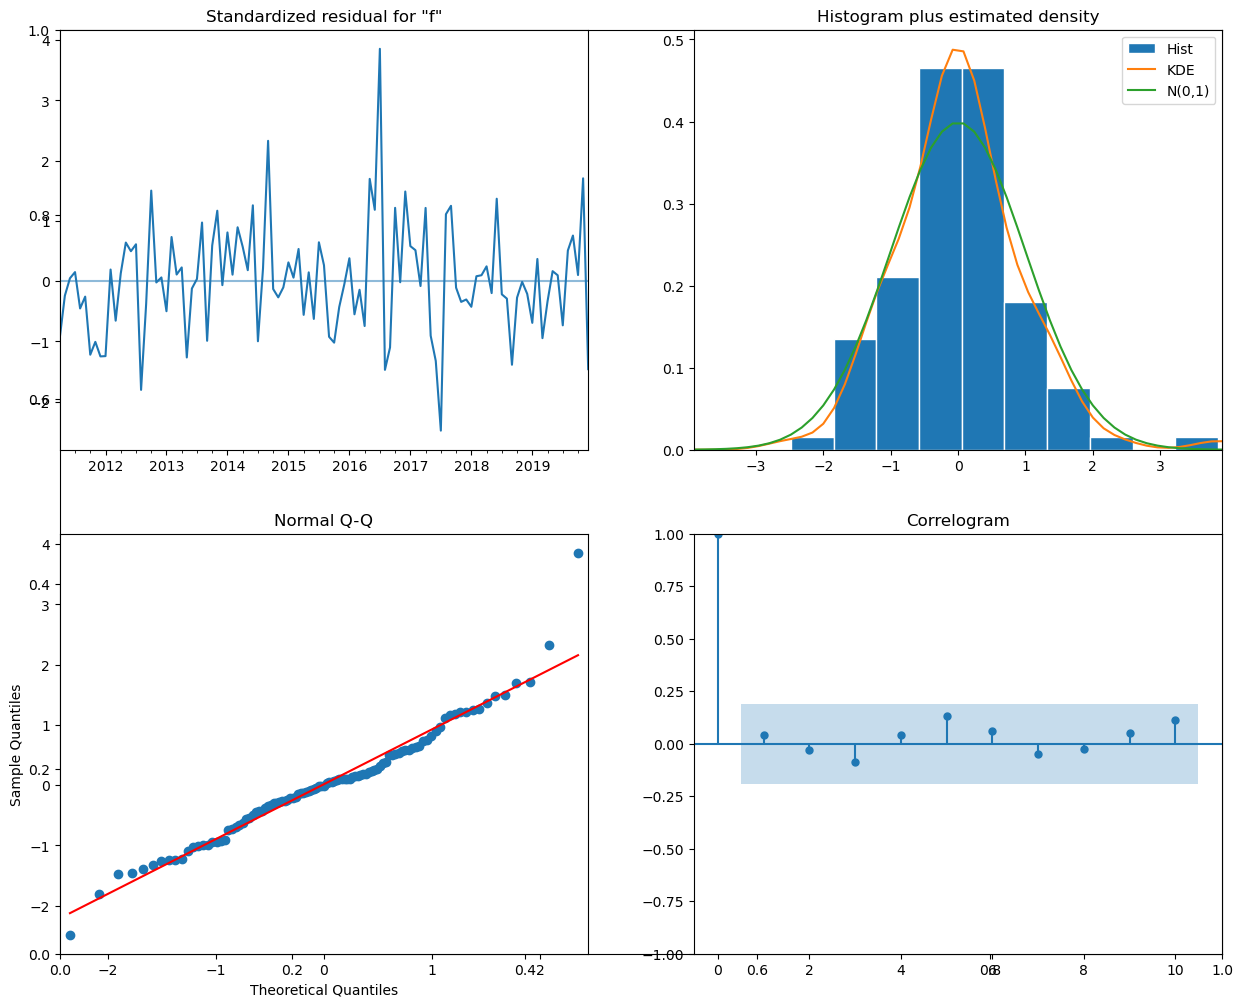

In [136]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)

In [137]:
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = ARIMA(history,order=(2,0,1)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

C:\Users\User\AppData\Local\Temp/ipykernel_9300/3864328569.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\AppData\Local\Temp/ipykernel_9300/3864328569.py:6: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\AppData\Local\Temp/ipykernel_930

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\AppData\Local\Temp/ipykernel_9300/3864328569.py:6: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\AppData\Local\Temp/ipykernel_9300/3864328569.py:7: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.

C:\Users\User\AppData\Local\Temp/ipykernel_9300/3864328569.py:7: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\AppData\Local\Temp/ipykernel_9300/3864328569.py:6: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\User\AppData\Local\Temp/ipykernel_9300/3864328569.py:7: FutureWa

In [138]:
test_mae = mean_absolute_error(y_test,y_pred_wfv)
test_r2 = r2_score(y_test,y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))
print("Test r2 (walk forward validation):", round(test_r2, 2))

Test MAE (walk forward validation): 8653.87
Test r2 (walk forward validation): 0.95


# Forcasting Using ARMA

In [139]:
model = ARIMA(y,order=(2,0,1)).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [140]:
model.forecast(1)

2022-04-01    1.119268e+06
Freq: MS, dtype: float64